In [124]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from pymongo import MongoClient
from tqdm import tqdm

In [160]:
client = MongoClient('localhost', 27017)
db = client['IAtest']

analisis_predictivos = db['modelos_de_analisis']
data = list(analisis_predictivos.find())

In [116]:
acciones_preventivas = [
    "Mantener reposo en cama",
    "Beber líquidos abundantes",
    "Tomar medicamentos para el dolor de cabeza",
    "Consultar a un médico",
    "Realizar ejercicios de respiración profunda",
    "Evitar alimentos grasosos",
    "Aplicar compresas frías en la frente",
    "Monitorear la presión arterial regularmente",
]

In [161]:
# Datos de ejemplo: síntomas, signos vitales y acciones preventivas
# sintomas_list = np.array([[1, 0, 1, 0, 1, 0, 1, 0, 1],
#                      [0, 0, 0, 0, 0, 1, 1, 1, 1],
#                      [0, 1, 0, 1, 0, 1, 0, 1, 0],
#                      [1, 1, 1, 1, 1, 1, 1, 1, 1],
#                      [0, 0, 1, 0, 1, 1, 0, 0, 0]])

# signos_vitales_list = np.array([[37.5, 120, 80, 70, 100, 1.5],
#                    [37.0, 118, 78, 72, 105, 1.6],
#                    [37.3, 122, 82, 68, 95, 1.7],
#                    [36.9, 119, 79, 75, 110, 1.8],
#                    [37.2, 121, 81, 71, 98, 1.9]])

# acciones_preventivas_list = np.array([5.0, 10.0, 15.0, 20.0, 25.0])

sintomas_list = []
signos_vitales_list = []
acciones_preventivas_list = []
caracteristica_list = []

for value in tqdm(data, desc="Realizando Analisis", unit="modelo"):
    caracteristica = []
    sintomas = value["sintomas"]
    # print(sintomas)
    caracteristica = [1 if sintoma else 0 for sintoma in sintomas.values()]
    
    signos_vitales = value["signos_vitales"]
    # print(signos_vitales)
    # sintomas_codificados = [ ]
    for signos_vitales in signos_vitales.values():
        caracteristica.append(signos_vitales)
    # print(sintomas_codificados) 
    caracteristica_list.append(caracteristica)
    # signos_vitales_list.append(caracteristica)
    
    acciones_preventivas_list.append(acciones_preventivas.index(value["accion_preventiva"]))

# sintomas_list = np.array(sintomas_list)
# signos_vitales_list = np.array(signos_vitales_list)
 
caracteristica_list = np.array(caracteristica_list)
acciones_preventivas_list = np.array(acciones_preventivas_list)

Realizando Analisis: 100%|██████████| 800000/800000 [00:02<00:00, 315856.03modelo/s]


In [162]:
# print(sintomas_list)
# print(sintomas_list)
# print(signos_vitales_list)
print(len(caracteristica_list))
print(len(acciones_preventivas_list))

800000
800000


In [170]:
# Definición del modelo de regresión lineal
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[15])  # 15 características de entrada (síntomas)
])

# Compilación del modelo
# model.compile(optimizer='Adam', loss='mean_squared_error')

model.compile(optimizer=Adam(0.01), loss='mean_squared_error')
# model.compile(optimizer='sgd', loss='mean_squared_error')

caracteristica_list = tf.stack(caracteristica_list)
acciones_preventivas_list = tf.stack(acciones_preventivas_list)

In [171]:
# Entrenamiento del modelo
historial = model.fit(np.array(caracteristica_list), np.array(acciones_preventivas_list),epochs=10)

# Evaluación del modelo
test_loss = model.evaluate(np.array(caracteristica_list), np.array(acciones_preventivas_list))
print(f'Error cuadrático medio en datos de entrenamiento: {test_loss}')

Epoch 1/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 13s 494us/step - loss: 11.5990
Epoch 2/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 12s 495us/step - loss: 0.0126
Epoch 3/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 13s 512us/step - loss: 0.0126
Epoch 4/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 12s 495us/step - loss: 0.0126
Epoch 5/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 13s 509us/step - loss: 0.0128
Epoch 6/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 13s 503us/step - loss: 0.0124
Epoch 7/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 13s 502us/step - loss: 0.0127
Epoch 8/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 13s 512us/step - loss: 0.0127
Epoch 9/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 13s 506us/step - loss: 0.0128
Epoch 10/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 13s 519us/step - loss: 0.0126
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 11s 451us/step - loss: 7.4965e-05
Error cuadrático medio en datos de entrenamiento: 8.116556273307651e-05


In [179]:
new_symptoms = np.array([[1,1,1,1,0,0,0,0,0,36,120,80,70,100,1.5]])
print(new_symptoms)

[[  1.    1.    1.    1.    0.    0.    0.    0.    0.   36.  120.   80.
   70.  100.    1.5]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicciones de acciones preventivas:
Síntomas: [  1.    1.    1.    1.    0.    0.    0.    0.    0.   36.  120.   80.
  70.  100.    1.5], Acción preventiva predicha: [0.01011397]


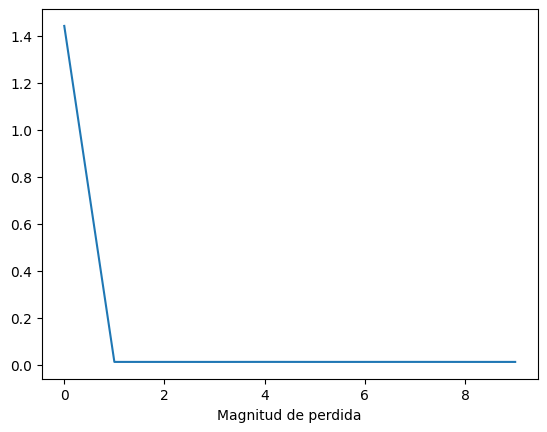

In [180]:
# Hacer predicciones
predictions = model.predict(new_symptoms)
print("Predicciones de acciones preventivas:")
for i in range(len(new_symptoms)):
    print(f'Síntomas: {new_symptoms[i]}, Acción preventiva predicha: {predictions[i]}')

# Visualización de los datos y la línea de regresión
# plt.scatter(signos_vitales_list[:, 0], acciones_preventivas_list, color='red', label='Temperatura')
# plt.scatter(signos_vitales_list[:, 1], acciones_preventivas_list, color='blue', label='Presión Sistólica')
# plt.scatter(signos_vitales_list[:, 2], acciones_preventivas_list, color='green', label='Presión Diastólica')
# plt.scatter(signos_vitales_list[:, 3], acciones_preventivas_list, color='orange', label='Frecuencia Cardiaca')
# plt.scatter(signos_vitales_list[:, 4], acciones_preventivas_list, color='purple', label='Glucosa')
# plt.scatter(signos_vitales_list[:, 5], acciones_preventivas_list, color='yellow', label='Presión Arterial')

# plt.title('Relación entre Signos Vitales y Acciones Preventivas')
# plt.xlabel('Signos Vitales')
# plt.ylabel('Acciones Preventivas')
# plt.legend()
plt.xlabel("#Epoca")
plt.xlabel("Magnitud de perdida")
plt.plot(historial.history['loss'])
plt.show()

In [56]:
new_symptoms = np.array([[0,0,0,0,0,0,0,0,0]])
predictions = model.predict(new_symptoms)
print(int(predictions))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
48


C:\Users\developer\AppData\Local\Temp\ipykernel_18840\163230475.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(int(predictions))
